In [1]:
import gym
import numpy as np

env = gym.make("CartPole-v0") # 建立CartPole 遊戲的執行環境
observation = env.reset()
for k in range(100):
    env.render()
    action = np.random.randint(2)
    observation, reward, done, info = env.step(action)
env.close()


/usr/local/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


[-1.2  0.   1.2]
0
1
2
3
0 Episode finished after 12.000000 time steps mean 0.000000
1 Episode finished after 12.000000 time steps mean 0.120000
2 Episode finished after 30.000000 time steps mean 0.240000
3 Episode finished after 18.000000 time steps mean 0.540000
4 Episode finished after 21.000000 time steps mean 0.720000
5 Episode finished after 12.000000 time steps mean 0.930000
6 Episode finished after 31.000000 time steps mean 1.050000
7 Episode finished after 34.000000 time steps mean 1.360000
8 Episode finished after 15.000000 time steps mean 1.700000
9 Episode finished after 12.000000 time steps mean 1.850000
10 Episode finished after 15.000000 time steps mean 1.970000
11 Episode finished after 31.000000 time steps mean 2.120000
12 Episode finished after 13.000000 time steps mean 2.430000
13 Episode finished after 29.000000 time steps mean 2.560000
14 Episode finished after 13.000000 time steps mean 2.850000
15 Episode finished after 11.000000 time steps mean 2.980000
16 Episod

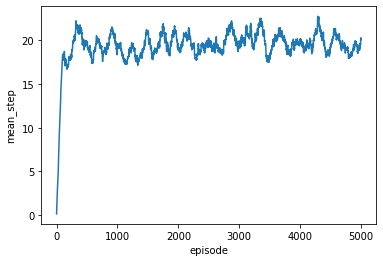

In [1]:
# Q learning
import numpy as np
import gym

# 用三個數字將-2.4~2.4 分成四個區間
bins = np.linspace(-2.4, 2.4, 4+1)[1:-1]
print(bins)
print(np.digitize(-2, bins))
print(np.digitize(-1, bins))
print(np.digitize(0.6, bins))
print(np.digitize(1.5, bins))

env = gym.make("CartPole-v0") # 建立CartPole 遊戲的執行環境

num_episodes = 5000 # 執行多少回合
max_number_of_steps = 200 # 每回合最多步驟, 最多推幾次
num_consecutive_iterations = 100 # 取最後 100 回合來計算平均分數
last_time_steps = np.zeros(num_consecutive_iterations) # 用來記錄最後100回合的分數
goal_average_steps = 195 # 設定若平均分數達到195分代表訓練成功
q_table = np.random.uniform(low=-1, high=1, size=(4 ** 4, env.action_space.n))

# 將數字clip_min～clip_max分成num個區間
def bins(clip_min, clip_max, num):
    return np.linspace(clip_min, clip_max, num+1)[1:-1]

# 將四個環境值轉換為狀態0~狀態255
def digitize_state(observation):
    cart_pos, cart_v, pole_angle, pole_v = observation
    digitized = [np.digitize(cart_pos, bins=bins(-2.4, 2.4, 4)),
                 np.digitize(cart_v, bins=bins(-3.0, 3.0, 4)),
                 np.digitize(pole_angle, bins=bins(-0.5, 0.5, 4)),
                 np.digitize(pole_v, bins=bins(-2.0, 2.0, 4))]
    return sum([x * (4 ** i) for i, x in enumerate(digitized)])

# 依目前資訊更新Q-table並取得下次動作與狀態需要傳入本次狀態,本次動作,動作後環境值,動作後獎勵
def get_action(state, action, observation, reward):
    next_state = digitize_state(observation) # 用動作後的環境值計算出下次的狀態
    next_action = np.argmax(q_table[next_state]) # 從下次狀態中找出價值最高的動作作為下次動作

    alpha = 0.2 # 設定新值要採用的比率
    gamma = 0.99 # 未來分數會乘上的折扣因子
    # 更新 Q-table
    q_table[state, action] = (1 - alpha) * q_table[state, action] + alpha * (reward + gamma * q_table[next_state, next_action])
    return next_action, next_state

step_list = []
for episode in range(num_episodes):
    observation = env.reset()

    state = digitize_state(observation)
    action = np.argmax(q_table[state])
    episode_reward = 0
    for t in range(max_number_of_steps):
        env.render()
        # 執行動作
        observation, reward, done, info = env.step(action)
        # 取得下次動作與狀態
        action, state = get_action(state, action, observation, reward)
        # 累計這個回合的分數, 此分數代表這回合連續推倒幾次沒有倒
        episode_reward += reward
        # 遊戲結束, 桿子倒下
        if done:
            print('%d Episode finished after %f time steps mean %f' % (episode, t+1, last_time_steps.mean()))
            # 將本回合的分數放入 last_time_steps
            last_time_steps = np.hstack((last_time_steps[1:], [episode_reward]))
            # 將這次回合結束時的平均分數放入 step_list 以便繪製關係圖
            step_list.append(last_time_steps.mean())
            break
        if (last_time_steps.mean() >= goal_average_steps):
            print('Episode  %d train agent successfully!' % episode)
            break

import matplotlib.pyplot as plt
plt.plot(step_list)
plt.xlabel('episode')
plt.ylabel('mean_step')
plt.show()

0 Episode finished after 10.000000 time steps mean 0.000000
1 Episode finished after 11.000000 time steps mean 0.100000
2 Episode finished after 12.000000 time steps mean 0.210000
3 Episode finished after 13.000000 time steps mean 0.330000
4 Episode finished after 19.000000 time steps mean 0.460000
5 Episode finished after 10.000000 time steps mean 0.650000
6 Episode finished after 9.000000 time steps mean 0.750000
7 Episode finished after 10.000000 time steps mean 0.840000
8 Episode finished after 13.000000 time steps mean 0.940000
9 Episode finished after 10.000000 time steps mean 1.070000
10 Episode finished after 14.000000 time steps mean 1.170000
11 Episode finished after 11.000000 time steps mean 1.310000
12 Episode finished after 9.000000 time steps mean 1.420000
13 Episode finished after 28.000000 time steps mean 1.510000
14 Episode finished after 13.000000 time steps mean 1.790000
15 Episode finished after 9.000000 time steps mean 1.920000
16 Episode finished after 17.000000 t

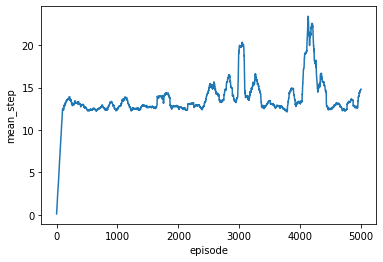

In [1]:
# Q learning - greedy
import numpy as np
import gym

env = gym.make("CartPole-v0") # 建立CartPole 遊戲的執行環境

num_episodes = 5000 # 執行多少回合
max_number_of_steps = 200 # 每回合最多步驟, 最多推幾次
num_consecutive_iterations = 100 # 取最後 100 回合來計算平均分數
last_time_steps = np.zeros(num_consecutive_iterations) # 用來記錄最後100回合的分數
goal_average_steps = 195 # 設定若平均分數達到195分代表訓練成功
q_table = np.random.uniform(low=-1, high=1, size=(4 ** 4, env.action_space.n))

# 將數字clip_min～clip_max分成num個區間
def bins(clip_min, clip_max, num):
    return np.linspace(clip_min, clip_max, num+1)[1:-1]

# 將四個環境值轉換為狀態0~狀態255
def digitize_state(observation):
    cart_pos, cart_v, pole_angle, pole_v = observation
    digitized = [np.digitize(cart_pos, bins=bins(-2.4, 2.4, 4)),
                 np.digitize(cart_v, bins=bins(-3.0, 3.0, 4)),
                 np.digitize(pole_angle, bins=bins(-0.5, 0.5, 4)),
                 np.digitize(pole_v, bins=bins(-2.0, 2.0, 4))]
    return sum([x * (4 ** i) for i, x in enumerate(digitized)])

# 依目前資訊更新Q-table並取得下次動作與狀態需要傳入本次狀態,本次動作,動作後環境值,動作後獎勵
def get_action(state, action, observation, reward):
    next_state = digitize_state(observation) # 用動作後的環境值計算出下次的狀態

    epsilon = 0.2 # 20% 的機率隨機挑選動作
    # 從0~1隨機取1數字, 若小於0.2 便隨機探索
    if epsilon <= np.random.uniform(0, 1):
        next_action = np.argmax(q_table[next_state])
    else:
        next_action = np.random.choice([0, 1]) # 隨機決定往左或往右推


    alpha = 0.2 # 設定新值要採用的比率
    gamma = 0.99 # 未來分數會乘上的折扣因子
    # 更新 Q-table
    q_table[state, action] = (1 - alpha) * q_table[state, action] + alpha * (reward + gamma * q_table[next_state, next_action])
    return next_action, next_state

step_list = []
for episode in range(num_episodes):
    observation = env.reset()

    state = digitize_state(observation)
    action = np.argmax(q_table[state])
    episode_reward = 0
    for t in range(max_number_of_steps):
        env.render()
        # 執行動作
        observation, reward, done, info = env.step(action)
        # 取得下次動作與狀態
        action, state = get_action(state, action, observation, reward)
        # 累計這個回合的分數, 此分數代表這回合連續推倒幾次沒有倒
        episode_reward += reward
        # 遊戲結束, 桿子倒下
        if done:
            print('%d Episode finished after %f time steps mean %f' % (episode, t+1, last_time_steps.mean()))
            # 將本回合的分數放入 last_time_steps
            last_time_steps = np.hstack((last_time_steps[1:], [episode_reward]))
            # 將這次回合結束時的平均分數放入 step_list 以便繪製關係圖
            step_list.append(last_time_steps.mean())
            break
        if (last_time_steps.mean() >= goal_average_steps):
            print('Episode  %d train agent successfully!' % episode)
            break

import matplotlib.pyplot as plt
plt.plot(step_list)
plt.xlabel('episode')
plt.ylabel('mean_step')
plt.show()

0 Episode finished after 13.000000 time steps mean 0.000000
1 Episode finished after 34.000000 time steps mean 0.130000
2 Episode finished after 20.000000 time steps mean 0.470000
3 Episode finished after 10.000000 time steps mean 0.670000
4 Episode finished after 12.000000 time steps mean 0.770000
5 Episode finished after 37.000000 time steps mean 0.890000
6 Episode finished after 10.000000 time steps mean 1.260000
7 Episode finished after 21.000000 time steps mean 1.360000
8 Episode finished after 12.000000 time steps mean 1.570000
9 Episode finished after 32.000000 time steps mean 1.690000
10 Episode finished after 16.000000 time steps mean 2.010000
11 Episode finished after 20.000000 time steps mean 2.170000
12 Episode finished after 34.000000 time steps mean 2.370000
13 Episode finished after 10.000000 time steps mean 2.710000
14 Episode finished after 13.000000 time steps mean 2.810000
15 Episode finished after 10.000000 time steps mean 2.940000
16 Episode finished after 12.00000

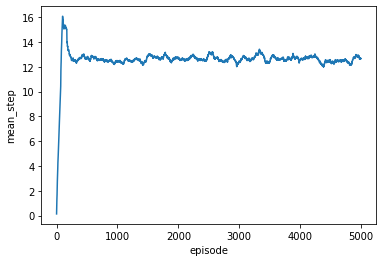

In [2]:
# Q learning - greedy 調整學習初期探索頻率
import numpy as np
import gym

env = gym.make("CartPole-v0") # 建立CartPole 遊戲的執行環境

num_episodes = 5000 # 執行多少回合
max_number_of_steps = 200 # 每回合最多步驟, 最多推幾次
num_consecutive_iterations = 100 # 取最後 100 回合來計算平均分數
last_time_steps = np.zeros(num_consecutive_iterations) # 用來記錄最後100回合的分數
goal_average_steps = 195 # 設定若平均分數達到195分代表訓練成功
q_table = np.random.uniform(low=-1, high=1, size=(4 ** 4, env.action_space.n))

# 將數字clip_min～clip_max分成num個區間
def bins(clip_min, clip_max, num):
    return np.linspace(clip_min, clip_max, num+1)[1:-1]

# 將四個環境值轉換為狀態0~狀態255
def digitize_state(observation):
    cart_pos, cart_v, pole_angle, pole_v = observation
    digitized = [np.digitize(cart_pos, bins=bins(-2.4, 2.4, 4)),
                 np.digitize(cart_v, bins=bins(-3.0, 3.0, 4)),
                 np.digitize(pole_angle, bins=bins(-0.5, 0.5, 4)),
                 np.digitize(pole_v, bins=bins(-2.0, 2.0, 4))]
    return sum([x * (4 ** i) for i, x in enumerate(digitized)])

# 依目前資訊更新Q-table並取得下次動作與狀態需要傳入本次狀態,本次動作,動作後環境值,動作後獎勵
def get_action(state, action, observation, reward):
    next_state = digitize_state(observation) # 用動作後的環境值計算出下次的狀態

    epsilon = 0.5 * (0.99 ** episode) # 回合數越高 epsilon 越小
    # 從0~1隨機取1數字, 若小於0.2 便隨機探索
    if epsilon <= np.random.uniform(0, 1):
        next_action = np.argmax(q_table[next_state])
    else:
        next_action = np.random.choice([0, 1]) # 隨機決定往左或往右推


    alpha = 0.2 # 設定新值要採用的比率
    gamma = 0.99 # 未來分數會乘上的折扣因子
    # 更新 Q-table
    q_table[state, action] = (1 - alpha) * q_table[state, action] + alpha * (reward + gamma * q_table[next_state, next_action])
    return next_action, next_state

step_list = []
for episode in range(num_episodes):
    observation = env.reset()

    state = digitize_state(observation)
    action = np.argmax(q_table[state])
    episode_reward = 0
    for t in range(max_number_of_steps):
        env.render()
        # 執行動作
        observation, reward, done, info = env.step(action)
        # 取得下次動作與狀態
        action, state = get_action(state, action, observation, reward)
        # 累計這個回合的分數, 此分數代表這回合連續推倒幾次沒有倒
        episode_reward += reward
        # 遊戲結束, 桿子倒下
        if done:
            print('%d Episode finished after %f time steps mean %f' % (episode, t+1, last_time_steps.mean()))
            # 將本回合的分數放入 last_time_steps
            last_time_steps = np.hstack((last_time_steps[1:], [episode_reward]))
            # 將這次回合結束時的平均分數放入 step_list 以便繪製關係圖
            step_list.append(last_time_steps.mean())
            break
        if (last_time_steps.mean() >= goal_average_steps):
            print('Episode  %d train agent successfully!' % episode)
            break

import matplotlib.pyplot as plt
plt.plot(step_list)
plt.xlabel('episode')
plt.ylabel('mean_step')
plt.show()


In [ ]:
# Q learning - greedy 調整學習初期探索頻率 + 懲罰機制
import numpy as np
import gym

env = gym.make("CartPole-v0") # 建立CartPole 遊戲的執行環境

num_episodes = 5000 # 執行多少回合
max_number_of_steps = 200 # 每回合最多步驟, 最多推幾次
num_consecutive_iterations = 100 # 取最後 100 回合來計算平均分數
last_time_steps = np.zeros(num_consecutive_iterations) # 用來記錄最後100回合的分數
goal_average_steps = 195 # 設定若平均分數達到195分代表訓練成功
q_table = np.random.uniform(low=-1, high=1, size=(4 ** 4, env.action_space.n))

# 將數字clip_min～clip_max分成num個區間
def bins(clip_min, clip_max, num):
    return np.linspace(clip_min, clip_max, num+1)[1:-1]

# 將四個環境值轉換為狀態0~狀態255
def digitize_state(observation):
    cart_pos, cart_v, pole_angle, pole_v = observation
    digitized = [np.digitize(cart_pos, bins=bins(-2.4, 2.4, 4)),
                 np.digitize(cart_v, bins=bins(-3.0, 3.0, 4)),
                 np.digitize(pole_angle, bins=bins(-0.5, 0.5, 4)),
                 np.digitize(pole_v, bins=bins(-2.0, 2.0, 4))]
    return sum([x * (4 ** i) for i, x in enumerate(digitized)])

# 依目前資訊更新Q-table並取得下次動作與狀態需要傳入本次狀態,本次動作,動作後環境值,動作後獎勵
def get_action(state, action, observation, reward):
    next_state = digitize_state(observation) # 用動作後的環境值計算出下次的狀態

    epsilon = 0.5 * (0.99 ** episode) # 回合數越高 epsilon 越小
    # 從0~1隨機取1數字, 若小於0.2 便隨機探索
    if epsilon <= np.random.uniform(0, 1):
        next_action = np.argmax(q_table[next_state])
    else:
        next_action = np.random.choice([0, 1]) # 隨機決定往左或往右推


    alpha = 0.2 # 設定新值要採用的比率
    gamma = 0.99 # 未來分數會乘上的折扣因子
    # 更新 Q-table
    q_table[state, action] = (1 - alpha) * q_table[state, action] + alpha * (reward + gamma * q_table[next_state, next_action])
    return next_action, next_state

step_list = []
for episode in range(num_episodes):
    observation = env.reset()

    state = digitize_state(observation)
    action = np.argmax(q_table[state])
    episode_reward = 0
    for t in range(max_number_of_steps):
        env.render()
        # 執行動作
        observation, reward, done, info = env.step(action)
        if done:
            reward = -200 # 加入懲罰機制, 若這個動作導致桿子倒下便扣分
        # 取得下次動作與狀態
        action, state = get_action(state, action, observation, reward)
        # 累計這個回合的分數, 此分數代表這回合連續推倒幾次沒有倒
        episode_reward += reward
        # 遊戲結束, 桿子倒下
        if done:
            print('%d Episode finished after %f time steps mean %f' % (episode, t+1, last_time_steps.mean()))
            # 將本回合的分數放入 last_time_steps, 用 t + 1 作為本回合的分數
            last_time_steps = np.hstack((last_time_steps[1:], [t+1]))
            # 將這次回合結束時的平均分數放入 step_list 以便繪製關係圖
            step_list.append(last_time_steps.mean())
            break
        if (last_time_steps.mean() >= goal_average_steps):
            print('Episode  %d train agent successfully!' % episode)
            break

import matplotlib.pyplot as plt
plt.plot(step_list)
plt.xlabel('episode')
plt.ylabel('mean_step')
plt.show()


0 Episode finished after 9 steps / mean 0.790000
10 Episode finished after 8 steps / mean 1.670000
20 Episode finished after 9 steps / mean 2.560000
30 Episode finished after 10 steps / mean 3.460000
40 Episode finished after 10 steps / mean 4.350000
50 Episode finished after 9 steps / mean 5.250000
60 Episode finished after 8 steps / mean 6.360000
70 Episode finished after 11 steps / mean 8.760000
80 Episode finished after 56 steps / mean 12.960000
90 Episode finished after 113 steps / mean 21.900000
100 Episode finished after 102 steps / mean 30.830000
110 Episode finished after 124 steps / mean 44.440000
120 Episode finished after 163 steps / mean 58.340000
130 Episode finished after 175 steps / mean 73.530000
140 Episode finished after 155 steps / mean 86.440000
150 Episode finished after 140 steps / mean 100.730000
160 Episode finished after 148 steps / mean 112.150000
170 Episode finished after 91 steps / mean 127.830000
180 Episode finished after 173 steps / mean 139.730000
190 

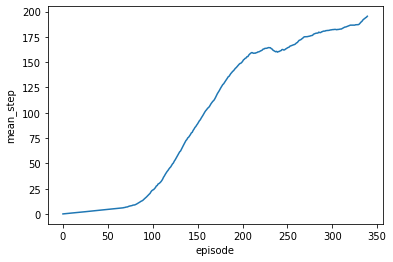

In [2]:
# Policy Gradient 策略梯度法
import gym
import numpy as np
import matplotlib.pyplot as plt

# 傳入目前的Ｗ參數與本回合的遊戲環境完成一回合的遊戲
def do_episode(w, env):
    done = False
    observation = env.reset()
    num_steps = 0

    while not done and num_steps <= max_number_of_steps:
        action = take_action(observation, w)
        observation, _, done, _ = env.step(action)
        num_steps += 1
    # 步數小於200則獎勵為(本回合所走的步數)-200
    step_val = -1 if num_steps >= max_number_of_steps \
        else num_steps - max_number_of_steps
    # 傳回本回合的獎勵與本回合所走的步數
    return step_val, num_steps

def take_action(X, w):
    # 傳入環境值Ｘ與目前的Ｗ參數呼叫calculate 計算後取得動作的機率值, 如果機率大於0就回傳1, 否則的話就回傳0
    action = 1 if calculate(X, w) > 0.0 else 0
    return action

def calculate(X, w):
    # 傳入環境值與目前的Ｗ參數計算動作的機率值
    result = np.dot(X, w)
    return result

env = gym.make('CartPole-v0')

#env.render()

eta = 0.2 # 設定學習率
sigma = 0.05 # 影響參數的標準差數值

max_episodes = 5000 # 要執行幾回合
max_number_of_steps = 200 # 每回合最多步驟, 最多推幾次
n_states = 4 # W 參數數量
num_batch = 10 # 批次訓練的每批回合數
num_consecutive_iterations = 100 # 取最後的 100 回合來計算平均分數

# 初始化
w = np.random.randn(n_states)
reward_list = np.zeros(num_batch)
reward_h = []
last_time_steps = np.zeros(num_consecutive_iterations)
mean_list = []

# 開始分批訓練
for episode in range(max_episodes//num_batch):
    # 用來改變參數的值是為偏差值
    N = np.random.normal(scale=sigma,size=(num_batch, w.shape[0]))
    for i in range(num_batch):
        # 加入偏差值
        w_try = w + N[i]
        # 完成本回合的遊戲然後取得本回合的獎勵與本回合所走的步數
        reward, steps = do_episode(w_try, env)
        if i == num_batch-1:
            print('%d Episode finished after %d steps / mean %f' %(episode*num_batch, steps, last_time_steps.mean()))
        # 將本回合的獎勵跟步數放入last_time_steps＆reward_list
        last_time_steps = np.hstack((last_time_steps[1:], [steps]))
        reward_list[i] = reward
        # 將這次回合結束時的平均分數放入 mean_list 以便繪製關係圖
        mean_list.append(last_time_steps.mean())

    # 平均得分超過195就結束學習
    if last_time_steps.mean() >= 195: break

    std = np.std(reward_list)
    if std == 0: std = 1
    # 正規化獎勵的數值
    A = (reward_list - np.mean(reward_list))/std
    # 偏微分計算
    w_delta = eta /(num_batch*sigma) * np.dot(N.T, A)
    # 更新ｗ參數
    w += w_delta


env.close()

plt.plot(mean_list)
plt.xlabel("episode")
plt.ylabel("mean_step")
plt.show()

